In [1]:
#https://www.tutorialspoint.com/connecting-two-points-on-a-3d-scatter-plot-in-python-and-matplotlib
# https://stackoverflow.com/questions/26182329/how-do-i-convert-new-data-into-the-pca-components-of-my-training-data
# https://stackoverflow.com/questions/20126061/creating-a-confidence-ellipsis-in-a-scatterplot-using-matplotlib

In [1]:
import os
import glob


from matplotlib.patches import Ellipse
from matplotlib import colors
from matplotlib import cm 
import matplotlib.cm as cm
from numpy.linalg import eig


import matplotlib


import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

os.chdir('./output')

# calculate PCA for infected and noninfected conditions

1158
1158


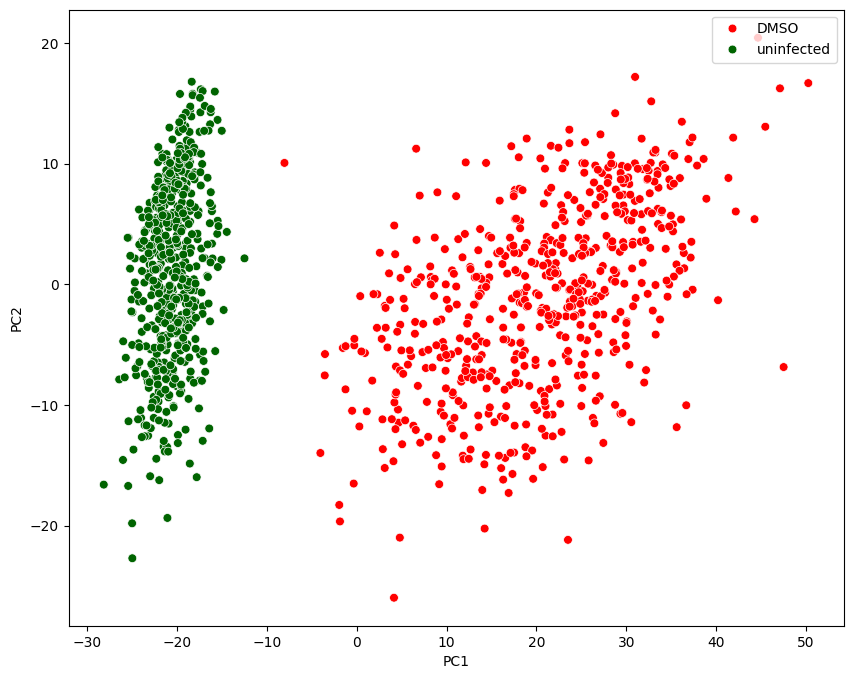

In [2]:
#
#
# ----------- no compounds  ---------------#
#
#

df_all = pd.read_parquet("level7_modz_consensus_df_perwell.parquet")

df = df_all.copy()

#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DMSO", "uninfected"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features

data  = df.loc[:, ~df.columns.str.contains('Meta')]
meta  = df.loc[:, df.columns.str.contains('Meta')]
data  = data.dropna()

data = data.values

pca = PCA(n_components=3)
scaler = StandardScaler()       

x = scaler.fit_transform(data) 
X_pca = pca.fit_transform(x)

print(len(X_pca))
print(len(meta))

PCA_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

meta_reset = meta.reset_index(drop=True)
PCA_df_reset = PCA_df.reset_index(drop=True)

df_old = pd.concat([meta_reset, PCA_df_reset], axis=1)
df_old = df_old.drop('Metadata_Well', axis=1)
df_old = df_old.drop('Metadata_plate_map_name', axis=1)

# colors manually defined

color_map_cmpds = {
    "uninfected": "darkgreen",
    "DMSO": "red"}

fig = plt.figure(figsize=(10, 8))
dfplot            = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
ax = sns.scatterplot(x      =  'PC1',
                     y      =  'PC2',
                    hue     =   df_old['Metadata_cmpdName'].values,
                   #palette =   'viridis', 
                   palette =   color_map_cmpds,
                    data    =   dfplot,
                    s       =   40)

sns.move_legend(ax, "upper right")

In [3]:
#
#
# ----------- compounds ---------------#
#
#

df = df_all.copy()


#------------- plates ----------------#
selected_plates = ["P103573","P103587","P103588"]
df = df[~df['Metadata_plate_map_name'].isin(selected_plates)]

# ----------- compounds ---------------#
selected_compounds = ["DD4386006","DO8167002","DI1202001"]
df = df[df['Metadata_cmpdName'].isin(selected_compounds)]

# remove AB features !!!
df = df.filter(regex='^(?!.*ER)') #remove AB features

data  = df.loc[:, ~df.columns.str.contains('Meta')]
meta  = df.loc[:, df.columns.str.contains('Meta')]

data_columns  = df.columns[~df.columns.str.contains('Meta')]
grouped_df    = df.groupby(['Metadata_cmpdName', 'Metadata_cmpdConc', 'Metadata_cmpdAndDose'])[data_columns].mean().reset_index()


data = data.values

x_new     = scaler.transform(data)  # use the same transformer to transform new data points into original PCA space
X_pca_new = pca.transform(x_new)


PCA_df = pd.DataFrame(X_pca_new, columns=['PC1', 'PC2', 'PC3'])

meta_reset = meta.reset_index(drop=True)
PCA_df_reset = PCA_df.reset_index(drop=True)

df_new = pd.concat([meta_reset, PCA_df_reset], axis=1)

df_new

,Metadata_plate_map_name,Metadata_cmpdName,Metadata_cmpdConc,Metadata_cmpdAndDose,Metadata_Well,PC1,PC2,PC3
0,P103555,DD4386006,0.300000,DD4386006_0.3,G01,-24.905092,-13.234122,-3.238974
1,P103555,DD4386006,0.300000,DD4386006_0.3,K05,-26.062155,-17.412066,3.027373
2,P103555,DD4386006,3.333333,DD4386006_3.333333,C01,-31.769838,-15.311012,-5.332499
3,P103555,DD4386006,3.333333,DD4386006_3.333333,G23,-31.947326,-9.067930,-4.704036
4,P103555,DD4386006,10.000000,DD4386006_10.0,E13,-40.469854,-21.313295,-11.163411
...,...,...,...,...,...,...,...,...
442,P103572,DO8167002,0.300000,DO8167002_0.3,F01,32.543408,-4.247710,1.277927
443,P103572,DO8167002,0.833333,DO8167002_0.833333,F09,-21.573455,2.187497,1.068106
444,P103572,DO8167002,3.333333,DO8167002_3.333333,F07,-21.776680,1.909742,1.777871
445,P103572,DO8167002,10.000000,DO8167002_10.0,F12,-22.053498,-0.282123,0.681555


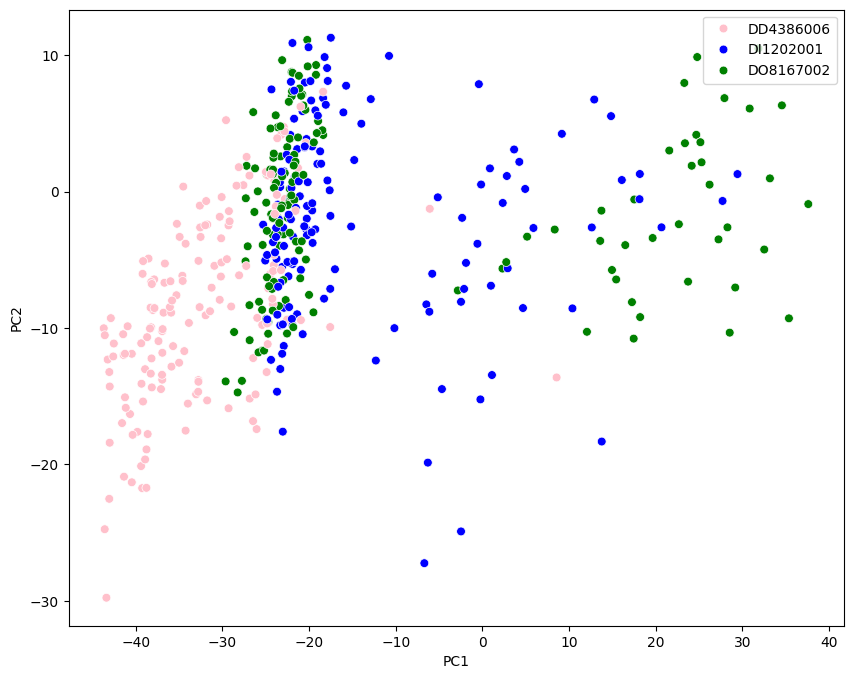

In [4]:
# colors manually defined

color_map_cmpds = {
    "DD4386006": "pink",
    "DO8167002": "green",
    "DI1202001": "blue"}


fig = plt.figure(figsize=(10, 8))
dfplot            = pd.DataFrame(X_pca_new, columns=['PC1', 'PC2','PC3'])
ax = sns.scatterplot(x      =  'PC1',
                     y      =  'PC2',
                    hue     =   df_new['Metadata_cmpdName'].values,
                 #palette =   'viridis', 
                   palette =   color_map_cmpds,
                    data    =   dfplot,
                    s       =   40)

sns.move_legend(ax, "upper right")

In [5]:
df_traj = pd.concat([df_old, df_new], axis=0)
df_traj

,Metadata_cmpdName,Metadata_cmpdConc,Metadata_cmpdAndDose,PC1,PC2,PC3,Metadata_plate_map_name,Metadata_Well
0,DMSO,0.300000,DMSO_0.3,23.509305,-21.182690,-3.409833,NaN,NaN
1,DMSO,0.300000,DMSO_0.3,41.358379,8.818690,8.406096,NaN,NaN
2,DMSO,0.300000,DMSO_0.3,18.774675,-13.502225,7.781644,NaN,NaN
3,DMSO,0.300000,DMSO_0.3,27.445249,-13.148634,5.757727,NaN,NaN
4,DMSO,0.300000,DMSO_0.3,23.659059,-0.457873,-5.480958,NaN,NaN
...,...,...,...,...,...,...,...,...
442,DO8167002,0.300000,DO8167002_0.3,32.543408,-4.247710,1.277927,P103572,F01
443,DO8167002,0.833333,DO8167002_0.833333,-21.573455,2.187497,1.068106,P103572,F09
444,DO8167002,3.333333,DO8167002_3.333333,-21.776680,1.909742,1.777871,P103572,F07
445,DO8167002,10.000000,DO8167002_10.0,-22.053498,-0.282123,0.681555,P103572,F12


# trajectory

In [6]:
df = df_traj.copy()

df['PC1'] = pd.to_numeric(df['PC1'], errors='coerce')
df['PC2'] = pd.to_numeric(df['PC2'], errors='coerce')

conditions = [
    df['Metadata_cmpdName'].isin(['uninfected']),
    df['Metadata_cmpdName'].isin(['DMSO']),
    df['Metadata_cmpdName'].isin(['DD4386006', 'DO8167002', 'DI1202001'])
]

values = ['ctrl', 'infected', 'antiviral']
df['group'] = np.select(conditions, values, default='unknown')  

df = df[df['group'] != 'unknown'].dropna(subset=['group'])

X_pca = df[['PC1', 'PC2']].to_numpy()

df['group'] = pd.Categorical(df['group'])
df['group_cmpd'] = df['group'].cat.codes
df['group_code'] = df['group_cmpd'].astype('category')
y = df['group_code'].to_numpy()

df['cmpdAndDose'] = pd.Categorical(df['Metadata_cmpdAndDose'])
df['cmpdAndDose_code'] = df['cmpdAndDose'].cat.codes
df['cmpdAndDose_code'] = df['cmpdAndDose_code'] / (len(df['cmpdAndDose'].cat.categories) - 1)

def merge_columns(row):
    return f"{row['Metadata_cmpdName']}_{row['Metadata_cmpdConc']}"

df['Metadata_cmpdNameConc'] = df.apply(merge_columns, axis=1)

cmpdNameConc_list = df["Metadata_cmpdNameConc"].unique().tolist()
cmpdName_list = df["Metadata_cmpdName"].unique().tolist()

compounds_to_plot_list       = ['DD4386006','DO8167002','DI1202001']

compounds_to_highlight_list = ["DD4386006", "DO8167002", "DI1202001"]
compounds_to_gray_list = list(set(cmpdName_list) - set(compounds_to_highlight_list))

compounds_dict = {
    row['Metadata_cmpdNameConc']: [row['PC1'], row['PC2'], row['group_cmpd']]
    for _, row in df[['Metadata_cmpdNameConc', 'PC1', 'PC2', 'group_cmpd']].iterrows()
}

compounds_dict

{'DMSO_0.3': [25.72446727191836, 5.852877578980685, 2],
 'uninfected_0.3': [-16.310000873079233, 6.730517952265878, 1],
 'DD4386006_0.3': [-24.245467040991294, -7.859013267801469, 0],
 'DD4386006_3.333333': [-29.491160771746017, -4.956052884656614, 0],
 'DD4386006_10.0': [-35.70264356076577, -11.329875007937835, 0],
 'DD4386006_30.0': [-39.175457019617966, -15.391683348899763, 0],
 'DI1202001_0.3': [4.2680379303425395, 2.178507805526616, 0],
 'DI1202001_3.333333': [-12.879763166073031, 6.779820908950919, 0],
 'DI1202001_10.0': [-19.59477012567561, -3.7630855002386228, 0],
 'DI1202001_30.0': [-17.625491386695998, 0.094349512026487, 0],
 'DO8167002_0.3': [32.54340755974596, -4.24771019174395, 0],
 'DO8167002_3.333333': [-21.776680011779053, 1.9097423183781046, 0],
 'DO8167002_10.0': [-22.053497838396932, -0.28212272611488837, 0],
 'DO8167002_30.0': [-24.62009794294901, -6.9329841830568935, 0],
 'DD4386006_0.008333': [8.573302866431453, -13.627786292172223, 0],
 'DD4386006_0.033333': [-6.

In [7]:
#- - - - - - - - - - - - - - - - - - HALOS - - - - - - - - - - - - - - - - - - - - - - -#

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]


#- - - - - - - - - - - - - - - - - - FIND COORDINATES  - - - - - - - - - - - - - - - - - - - - - - -#

def get_coordinates(cmpd_name, dose):
    dose_str = str(dose)
    cmpd_dose = [k for k in compounds_dict.keys() if cmpd_name in k and dose_str in k]
    
    if len(cmpd_dose) > 0:
        return compounds_dict[cmpd_dose[0]][0], compounds_dict[cmpd_dose[0]][1]
    else:
        return None  

#- - - - - - - - - - - - - - - - - -  DRAW LINES BETWEEN DOSES  - - - - - - - - - - - - - - - - - - - - - - -#


def draw_line(ax, start, end, rgba, linewidth=1, arrowstyle="-"):
    if start is not None and end is not None:  # Check if start and end are not None
        ax.plot([start[0], end[0]], [start[1], end[1]], color=rgba, linewidth=linewidth)
        if arrowstyle == "->":
            ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle=arrowstyle, color=rgba))

        


In [8]:
doses = df['Metadata_cmpdConc'].unique().tolist() 
doses = sorted(doses)
doses

[0.008333, 0.033333, 0.1, 0.3, 0.833333, 3.333333, 10.0, 30.0]

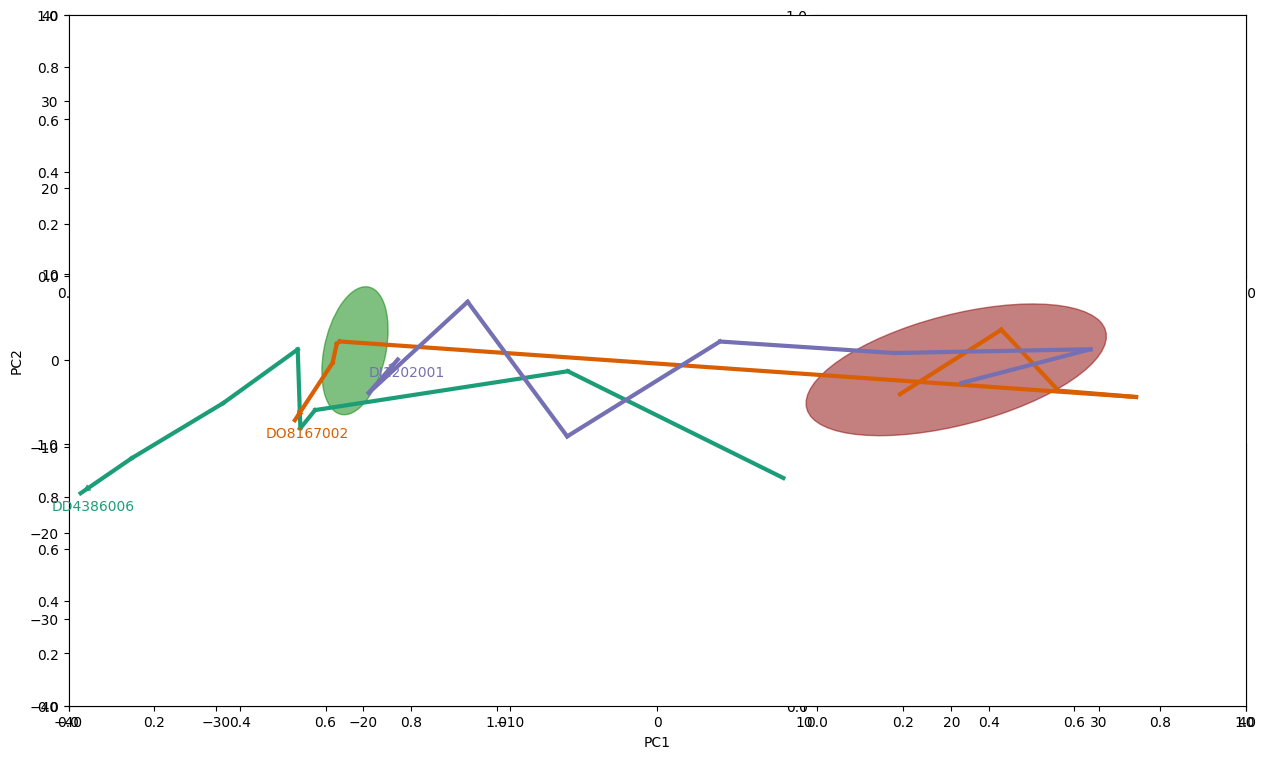

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout(pad=10.08, h_pad=10, w_pad=20, rect=None)

celllines = df['group'].unique().tolist()  # Updated to `tolist()`
celllines_halo = celllines[0:2]

for i, cellline in enumerate(celllines_halo):  # loop through groups for halos
    nstd = 2
    ax = plt.subplot()

    subdf = df.loc[df['group'] == cellline] 

    x = subdf["PC1"].to_list()
    y = subdf["PC2"].to_list()

    # Colors for the two halos
    c = ["darkred", "green"]

    # Plot halos
    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    w, h = nstd * np.sqrt(vals)  # number of standard deviations of the halo !
    ell = Ellipse(
        xy=(np.mean(x), np.mean(y)),
        width=w,
        height=h,
        angle=theta,
        edgecolor=c[i],
        facecolor=c[i],
        alpha=0.5
    )
    ax.add_artist(ell)

# --- TRAJECTORY PLOTTING --- #
doses = [0.008333, 0.033333, 0.1, 0.3, 0.833333, 3.333333, 10.0, 30.0]

cmap = matplotlib.colormaps.get_cmap('Dark2')

for i, cmpd_name in enumerate(compounds_to_plot_list):
    rgba = cmap(i)

    dose_coordinates = [get_coordinates(cmpd_name, dose) for dose in doses]

    color, linewidth, alpha, final_arrowstyle = ("gray", 2, 0.2, "->") if cmpd_name in compounds_to_gray_list else (rgba, 3, 1, "->")
    rgba = (*rgba[:3], alpha)

    for j in range(len(dose_coordinates) - 1):
        if dose_coordinates[j] is not None and dose_coordinates[j + 1] is not None:
            arrowstyle = "->" if j == len(dose_coordinates) - 2 else "-"
            draw_line(ax, dose_coordinates[j], dose_coordinates[j + 1], rgba, linewidth, arrowstyle)

    if cmpd_name in compounds_to_highlight_list:
        plt.annotate(cmpd_name, xy=(0, 0), xytext=(dose_coordinates[-1][0] - 2, dose_coordinates[-1][1] - 2), c=rgba)

# --- STYLE AND LAYOUT --- #
plt.ylabel("PC2")
plt.xlabel("PC1")

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

os.makedirs("trajectory", exist_ok=True)
plt.savefig("trajectory/PCA_trajectory.png", dpi=300)
plt.show()


_end